# FUNDING ANALYSIS FOR INDIAN STARTUPS

#### Team: Team Namibia

## Table of Contents


- [Business Understanding](#Business-Understanding)

- [Data Understanding](#data-understanding)
    - [Data Collection](#data-collection)
    - [Feature Description](#feature-description)
    - [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Data Quality Assessment](#data-quality-assessment)

- [Data Preparation](#data-preparation)
    - [Data Cleaning](#data-cleaning)
    -



## Business Understanding
Team Namibia aims to venture into the start-up space in India and being the data expert of the team, we've have been tasked with investigating the econmoic landscape and coming out with a course of action for this endeavour.


#### Problem Statement:
Investigating the dynamics of startup funding in India over the period from 2018 to 2021. The aim is to understand the trends, sector preferences, investment stages, key investors, and geographical distribution of the funding. Additionally, if there have been significant differences in funding amounts across different years and sectors, it can guide the action plan to be taken.

#### Objective
The goal of this analysis is to provide insights into the startup funding landscape in India from 2018 to 2021. 
- Identify trends and patterns in funding amounts over the years.
- Determine which sectors received the most funding and how sector preferences changed over time.
- Understand the distribution of funding across different stages of startups (e.g., Seed, Series A).
- Identify key investors and their investment behaviors.
- Analyze the geographical distribution of funding within India.

#### Analytical Questions
1. What are the trends and patterns in funding amounts for startups in India beetween 2018 to 2021?
   - Analyzing the annual and quarterly trends in funding can reveal patterns and growth trajectories. Look for peaks, dips, and any consistent growth patterns over these years.
2. Which sectors received the most funding, and how did sector preferences change over time from 2018 to 2021?
   - Identifying which industries or sectors received the most funding can show sectoral preferences and shifts. Understanding how this distribution has evolved over the years can highlight emerging trends and declining interests.
3. How is the distribution of funding across different stages of startups (e.g., Seed, Series A)?
   - Analyzing the funding amounts at different startup stages can provide insights into the investment appetite at various growth phases. It can also help in understanding the maturity and risk preference of investors.
4. Who are the key investors in Indian startups, and what are their investment behaviors/patterns?
   - Identifying the most active investors and analyzing their investment portfolios can shed light on key players in the ecosystem. Understanding their investment patterns can also reveal strategic preferences and alliances.
5. What is the geographical distribution of startup funding within India, and how has this distribution changed over the years 2018 to 2021?
   - Analyzing the geographical distribution of startup funding can show regional hotspots for entrepreneurship and investment. Observing how this has changed over the years can reveal shifts in regional focus and development.



### Null Hypothesis (H0)
There is no significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.

### Alternate Hypothesis (H1)
There is a significant difference in the funding amounts for startups in India between the years 2018 and 2021 across different sectors.


### Importing the necessary packages 

In [2]:
# Import the pyodbc library to handle ODBC database connections
import pyodbc 

# Import the dotenv function to load environment variables from a .env file
from dotenv import dotenv_values 

# Import the pandas and numpy library for data manipulation and analysis
import pandas as pd 
import numpy as np


# Importing Matplotlib for  visualizations in Python
import matplotlib.pyplot as plt

# Importing Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns


# Import the warnings library to handle warning messages
import warnings

# Filter out (ignore) any warnings that are raised
warnings.filterwarnings('ignore')


 ### Establishing a connection to the database

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the .env file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create the connection string using the retrieved credentials
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"



In [4]:
# Establish a connection to the database using the connection string
connection = pyodbc.connect(connection_string) 

In [5]:
# Define the SQL query to select all columns from the specified table
query = "Select * from dbo.LP1_startup_funding2020"

# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
data1 = pd.read_sql(query, connection)

data1

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [6]:
# Define the SQL query to select all columns from the specified table
query = "Select * from dbo.LP1_startup_funding2021"

# Execute the SQL query and fetch the result into a pandas DataFrame using the established database connection
data2 = pd.read_sql(query, connection)

data2

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [7]:
# Write the concatenated DataFrame 'df' to a CSV file named 'lp1.csv'
data1.to_csv('startup_funding2020.csv')
data2.to_csv('startup_funding2021.csv')

In [8]:
#Adding a year column to help in identifying each dataframe its the year 
data1['Year']=2020
data2['Year']=2021

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [9]:
#inspecting the datatype of data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [11]:
# Concatenate two DataFrames 'data1' and 'data2' vertically (along the rows)
df = pd.concat([data1, data2])
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2050 non-null   float64
 2   HeadQuarter    2169 non-null   object 
 3   Sector         2251 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2248 non-null   object 
 6   Investor       2164 non-null   object 
 7   Amount         2007 non-null   object 
 8   Stage          1372 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 212.2+ KB


In [21]:
# # Write the concatenated DataFrame 'df' to a CSV file named 'lp1.csv'
df.to_csv('2020-2021.csv')

df


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A,NaN,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D,NaN,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C,NaN,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B,NaN,2021


In [22]:
# viewing the data structure of the merged 2020-2021 datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2264 non-null   object 
 1   Founded        2050 non-null   float64
 2   HeadQuarter    2169 non-null   object 
 3   Sector         2251 non-null   object 
 4   What_it_does   2264 non-null   object 
 5   Founders       2248 non-null   object 
 6   Investor       2164 non-null   object 
 7   Amount         2007 non-null   object 
 8   Stage          1372 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 212.2+ KB


[Back to Top](#Table-of-Contents)


# Data Understanding

In this section, we seek to undestand the data that will help us solve our business problem/question. We detail how the briefly mention how the data was collected, we describe the useful features within the dataset, assess our data through an exploratory data analysis and then conclude with a data quality assessment

### Data Collection
The analysis for the Indian startup funding covers a span of 4 years and the data on each of the years comes via a unique dataset in a csv format. 
- Two of the datasets (2020 and 2021) were obtained from the sakila dataset online. The 2020 dataset was saved to a variable data1 whilst the 2021 dataset was saved to data2.
- The dataset for the year 2019 is a  file named "startup_funding2019.csv" obtained from OneDrive using the link https://azubiafrica-my.sharepoint.com/personal/teachops_azubiafrica_org/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fteachops%5Fazubiafrica%5Forg%2FDocuments%2FCareer%20Accelerator%20Data%5FSets%2FLP1%20Datasets&ga=1 
- The final dataset is a file with the name "startup_funding2018.csv" and was obtained from a Github Repository that can be accessed uusing this link https://github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis.


### Feature Description
Descrpition of the columns in the dataset: 

- Company/Brand: Name of the company/start-up
- Founded: Year start-up was established
- Headquarters/Location: Location where the start-up is headquartered
- Sector/Industry: The industry or sector in which the start-up operates, such as healthtech, fintech, etc.
- What it does/About Company: Brief overview of the company's function
- Founders: Founders of the Company
- Amount: Total amount raised by the start-up in each funding round
- Stage/Round: Details of the funding stages such as seed, series A, series B, etc.
- Investors: The names of the investors or investment firms involved

These are the useful variables that will provide the nexxesary data to answer our analytical business questions.



### Exploratory Data Analysis
#### Data Overview
Here we will take a look into the data using different methods to gain an overall perspective of the data structure (number of columns and rows), the  number of columns and their data types and a sample of the dataframe (a preview of a few rows and columns)

In [30]:
# Read data from the CSV file 'startup_funding2020.csv' into a DataFrame named d20
d18 = pd.read_csv(r'C:\Users\Administrator\Desktop\LP1\team namibia\tn dataset\startup_funding2018.csv')

# Display the first few rows of the DataFrame d20
d18.head()



,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [31]:
# Read data from the CSV file 'startup_funding2021.csv' into a DataFrame named d21
d19 = pd.read_csv(r'C:\Users\Administrator\Desktop\LP1\team namibia\tn dataset\startup_funding2019.csv')

# Display the first few rows of the DataFrame d20
d19.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [32]:
#Adding a year column to help in identifying each dataframe its the year 
d18['Year']=2018
d19['Year']=2019



In [33]:
# Print information about the structure of the DataFrame d18
d18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [34]:
# Print information about the structure of the DataFrame d21
d19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [35]:
#renaming the columns in d18 and d19 to match that of df
d18.rename(columns={'Company Name': 'Company_Brand'}, inplace=True)
d18.rename(columns={'Industry': 'Sector'}, inplace=True)
d18.rename(columns={'Round/Series': 'Stage'}, inplace=True)
d18.rename(columns={'Location': 'HeadQuarter'}, inplace=True)
d18.rename(columns={'About Company': 'What_it_does'}, inplace=True)
d19.rename(columns={'Company/Brand': 'Company_Brand'}, inplace=True)
d19.rename(columns={'What it does': 'What_it_does'}, inplace=True)
d19.rename(columns={'Amount($)': 'Amount'}, inplace=True)






In [47]:
# Concatenating DataFrames df, d18, and d19 vertically
tnlp = pd.concat([df, d18, d19])

# Exporting DataFrame tnlp to a CSV file named 'complete_dataset_raw.csv'
tnlp.to_csv('complete_dataset_raw.csv')

tnlp

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A,NaN,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B,NaN,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN,NaN,2019


In [48]:
# Display the shape of the DataFrame tnlp (number of rows, number of columns)
tnlp.shape

(2879, 11)

In [49]:
# Display the data structure of the DataFrame tnlp
tnlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   column10       2 non-null      object 
 10  Year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [50]:
# Generate summary statistics for the numerical columns in DataFrame tnlp 
num_stats = tnlp.describe().T

num_stats


,count,mean,std,min,25%,50%,75%,max
Founded,2110.0,2016.079621,4.368006,1963.0,2015.0,2017.0,2019.0,2021.0
Year,2879.0,2020.023619,1.086974,2018.0,2020.0,2020.0,2021.0,2021.0


In [51]:
# Generate descriptive statistics for the categorical columns in DataFrame d20
categorical_stats = tnlp.describe(include=['object']).T
categorical_stats

,count,unique,top,freq
Company_Brand,2879,2214,BharatPe,10
HeadQuarter,2765,172,Bangalore,764
Sector,2861,873,FinTech,173
What_it_does,2879,2691,BYJU'S is an educational technology company th...,5
Founders,2334,1980,Byju Raveendran,7
Investor,2253,1777,Inflection Point Ventures,36
Amount,2622,774,—,148
Stage,1941,75,Seed,606
column10,2,2,Pre-Seed,1


#### Univariate Analysis
Here, we can use attempt using different means to undestand the distributionof numeric variables, identify skewness and detect outliers using graphs like histograms, box plots or even bar plots. However, due to the nature of our data (how dirty it is), we are limited in which graphs we can use as we have so much unclean data to be able to generate a useful chart output at this stage. The meaniful visuals we obtained were the bar plot of Sectors and the box plot of Stage and AMount.

Year
2021    1209
2020    1055
2018     526
2019      89
Name: count, dtype: int64


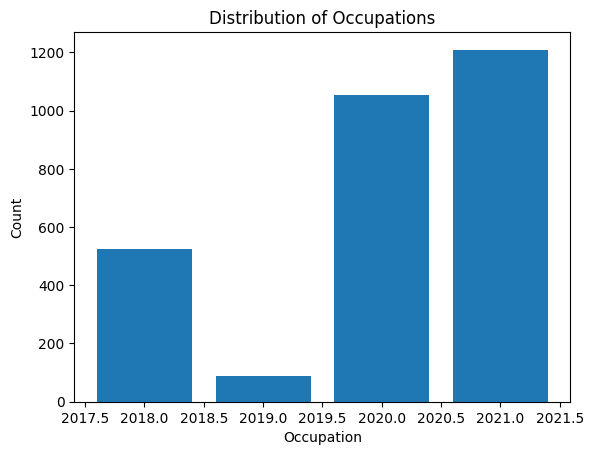

In [52]:
# Example for categorical column 'occupation'
funding_trend = tnlp['Year']

# Frequency table
ft_counts = funding_trend.value_counts()
print(ft_counts)

# Bar chart
plt.bar(ft_counts.index, ft_counts.values)
plt.xlabel('Years')
plt.ylabel('Frquency of Funding')
plt.title('Distribution of Funding across the years')
plt.show()

In [53]:

# Saving the Amount column in the series 'd20_Amount'
tnlp_amount = tnlp['Amount']



# Descriptive statistics of the column AMount
print(tnlp_amount.describe().T) 

count     2622
unique     774
top          —
freq       148
Name: Amount, dtype: object


In [18]:
 

# Identify outliers within the Amount column (using IQR)
KQ1 = d20['Amount'].quantile(0.25)  # Calculate 1st quartile of 'Amount'
KQ3 = d20['Amount'].quantile(0.75)  # Calculate 3rd quartile of 'Amount'
KIQR = KQ3 - KQ1  # Calculate Interquartile Range

# Identify outliers using IQR
outliersk = d20[(d20['Amount'] < (KQ1 - 1.5 * KIQR)) | (d20['Amount'] > (KQ3 + 1.5 * KIQR))]
print(f"Number of outliers: {len(outliersk)}")


Number of outliers: 115


#### Data Quality Assessment
With respect to Data Quality Assessment, it is where the quality of the data is assessed, including completeness, accuracy, consistency and relevance. This is a crucial step in understanding the shortcomings of our data and being able to use that knwoledge to plan how to handle/clean the data.

The combined dataset for 2018-2021 saved as tnlp has 11 columns and 2879 rows. It has but has 23 duplicate rows. The columns in the dataset are a mixture of strings/text (Company Brand, Sector, Headquarters, Founders, What it does, Investors, Stage, Amount, Column10), floats (Founded) and integers (Year). 

In this dataset, 3 columns had no missing values (Year, Company Brand and What it does) with majority of the columns having less than 20% missing values (HeadQuarter, Sector, Founders, Amount). Four columns had over 25% missing values which were  Investor (21.74%), Founded (26.71%), stage (32.58%) and Column10 (99.93%). 

From a quick preview,it was obvious column 10 have no relevance cause it possessed no useful data with respect to our project goals. Other columns that would not be needed in reaching our goals (answering the analytical business questions) are Founded, Founders and What_It_Does.

In [63]:
# Calculate the missing value count
missing_count = tnlp.isna().sum()

# Calculate the missing value percentage
missing_percentage = (missing_count / len(tnlp)) * 100
missing_percentage = missing_percentage.round(2)

# Concatenate the missing count and percentage into a DataFrame
missing_data = pd.concat([missing_count, missing_percentage], axis=1, keys=['Missing Count', 'Missing Percentage'])

# Display the result
print(missing_data)


               Missing Count  Missing Percentage
Company_Brand              0                0.00
Founded                  769               26.71
HeadQuarter              114                3.96
Sector                    18                0.63
What_it_does               0                0.00
Founders                 545               18.93
Investor                 626               21.74
Amount                   257                8.93
Stage                    938               32.58
column10                2877               99.93
Year                       0                0.00


In [60]:
# Check for duplicates in the d20 Dataframe
tnlp.duplicated().sum()



23

In [ ]:
#Listing all the unique values in the Location column
tnlp['Company_brand'].unique()

In [ ]:
#Listing all the unique values in the Sector column
tnlp['Sector'].unique()

In [ ]:
#Listing all the unique values in the Amount column
tnlp['Amount'].unique()

In [ ]:
#Listing all the unique values in the Location column
tnlp['Location'].unique()

In [ ]:
#Listing all the unique values in the Stage column
tnlp['Stage'].unique()

In [67]:
#Listing all the unique values in the Investor column
tnlp['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center', ...,
       'MyPreferred Transformation, Avendus Finance, SoftBank',
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India'], dtype=object)

[Back to Top](#Table-of-Contents)

### Data Cleaning
Messy data such as missing data and data in the wrong format can greatly impair our ability to analyze our data and gain useful insights from it. So at this stage, we clean the data so it can be useful in our analysis. 

#### Handling Missing Values
The unecessary columns are dropped from the dataset. For the two remaining columns with over 25% missing values (Stage and Amount), the rows that have missing values in both columns are also removed. The resulting dataframe is assessed for the new levels of missing data. For the columns wit less than 10% missing values, they are willed with either the median or mode.

In [24]:
#Viewing the missing values in each column of the dataframe d20
tnlp.isna().sum()

Unnamed: 0          0
Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [25]:
#dropping the unecessary columns
tnlp2= tnlp.drop(columns=['column10',  'Founded', 'What_it_does'])
tnlp2

,Company_Brand,HeadQuarter,Sector,Founders,Investor,Amount,Stage
0,Aqgromalin,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN
...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN
1051,EpiFi,NaN,Fintech,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,Mumbai,Cosmetics,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN
1053,Shuttl,Delhi,Transport,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [26]:

# Filter rows where either the 'Amount' and 'Name' column has missing values
d31= d20[ d20['Amount'].isna() & d20['Stage'].isna()]
#d31.shape

# Checking the missing values for the new Dataframe d30
d31


,Company_Brand,HeadQuarter,Sector,Founders,Investor,Amount,Stage
12,MasterG,New Delhi,Fashion startup,Gayatri Jolly,Acumen Fund's angel programme,NaN,NaN
18,Pine Labs,Noida,FinTech,Amrish Rau,"Mastercard, Temasek Holdings",NaN,NaN
29,Delhivery,Gurgaon,E-commerce,"Kapil Bharati, Mohit Tandon, Sahil Barua, Sura...","Steadview Capital, Canada Pension Plan Investm...",NaN,NaN
40,Fleeca India,Jaipur,Tyre management,Tikam Jain,Bridgestone India,NaN,NaN
44,PointOne Capital,Bangalore,Venture capitalist,Mihir Jha,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1021,IncubateHub,Bengaluru,Tech hub,Rajiv Mukherjee,Venture Catalysts,NaN,NaN
1022,Rage Coffee,Delhi,FMCG,Bharat Sethi,Refex Capital,NaN,NaN
1023,Skilancer,Noida,Technology,Neeraj Kumar,Venture Catalysts,NaN,NaN
1024,Harappa Education,New Delhi,Edtech,Pramath Raj Sinha,James Murdoch-led Lupa Systems,NaN,NaN


In [27]:
#dropping the missing rows for both Amount and Stage from the dataframe d20 and saving it as dataframe d20_Cleaned1
d20_cleaned1= d20.drop(index=d31.index)
d20_cleaned1

,Company_Brand,HeadQuarter,Sector,Founders,Investor,Amount,Stage
0,Aqgromalin,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN
...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN
1051,EpiFi,NaN,Fintech,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round
1052,Purplle,Mumbai,Cosmetics,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN
1053,Shuttl,Delhi,Transport,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C


In [28]:
#Checking the missing values in the new dataframe d20_cleaned1
d20_cleaned1.isna().sum()

Company_Brand      0
HeadQuarter       85
Sector            12
Founders          11
Investor          31
Amount           113
Stage            323
dtype: int64

In [29]:
# Impute missing values
d20_cleaned1['HeadQuarter'].fillna(d20_cleaned1['HeadQuarter'].mode()[0], inplace=True)
d20_cleaned1['Sector'].fillna(d20_cleaned1['Sector'].mode()[0], inplace=True)
d20_cleaned1['Founders'].fillna('Unknown', inplace=True)
d20_cleaned1['Investor'].fillna('Unknown', inplace=True)
d20_cleaned1['Amount'].fillna(d20_cleaned1['Amount'].median(), inplace=True)
d20_cleaned1['Stage'].fillna('Unknown', inplace=True)

In [30]:
# Impute missing values
d20_cleaned1['HeadQuarter'].fillna(d20_cleaned1['HeadQuarter'].mode()[0], inplace=True)
d20_cleaned1['Sector'].fillna(d20_cleaned1['Sector'].mode()[0], inplace=True)
d20_cleaned1['Founders'].fillna('Unknown', inplace=True)
d20_cleaned1['Investor'].fillna('Unknown', inplace=True)
d20_cleaned1['Amount'].fillna(d20_cleaned1['Amount'].median(), inplace=True)
d20_cleaned1['Stage'].fillna('Unknown', inplace=True)

In [31]:
#CVerifying that there are no missing values after the imputation process
d20_cleaned1.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

### Restructuring Data
After taking care of the missing values, there is still work to be done to make the dataset presentable and usable. This include renaming of columns to ensure that when merging with the other dataset, we havve identical column headers. Also, a column named Year will be added to be able to distinguish between rows from different dataset year when the merging occurs. 

In [32]:
#Renaming the columns in the DataFrame d20_cleaned1
d20_cleaned1.rename(columns={'Company_Brand' : 'Company_Name'}, inplace=True)
d20_cleaned1.rename(columns={'HeadQuarter' : 'Location'}, inplace=True)
d20_cleaned1.rename(columns={'Sector' : 'Industry'}, inplace=True)
d20_cleaned1.rename(columns={'Stage' : 'Funding_Stage'}, inplace=True)


In [33]:
#Adding a colomn named 'Year' to the dataframe d20_cleaned1
d20_cleaned1['Year']= 2020
d20_cleaned1

,Company_Name,Location,Industry,Founders,Investor,Amount,Funding_Stage,Year
0,Aqgromalin,Chennai,AgriTech,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Unknown,2020
1,Krayonnz,Bangalore,EdTech,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,Pune,Hygiene management,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,New Delhi,Escrow,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Unknown,2020
4,Gramophone,Indore,AgriTech,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Unknown,2020
...,...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,Unknown,2020
1051,EpiFi,Bangalore,Fintech,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,Mumbai,Cosmetics,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,Unknown,2020
1053,Shuttl,Delhi,Transport,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [34]:
#Viewing a summary on d20_cleaned1 to ensure that the columns have the desired datatypes
d20_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   914 non-null    object 
 1   Location       914 non-null    object 
 2   Industry       914 non-null    object 
 3   Founders       914 non-null    object 
 4   Investor       914 non-null    object 
 5   Amount         914 non-null    float64
 6   Funding_Stage  914 non-null    object 
 7   Year           914 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 64.3+ KB


### Handling Outliers
The presence of outliers can skew th eresults of our statisical analyses and as such we need to identify and handle/manage them. In this section, we study the presence of outliers in the Amount column of our dataset.


In [35]:
#Calculate the First and Third Quartiles (Q1 and Q3):
Q1 = d20_cleaned1['Amount'].quantile(0.25)
Q3 = d20_cleaned1['Amount'].quantile(0.75)

#Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers
outliers = d20_cleaned1[((d20_cleaned1['Amount'] < (Q1 - 1.5 * IQR)) | (d20_cleaned1['Amount'] > (Q3 + 1.5 * IQR)))]
outliers


,Company_Name,Location,Industry,Founders,Investor,Amount,Funding_Stage,Year
8,Rupeek,Bangalore,FinTech,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,2020
15,Zomato,Gurgaon,Food Delivery,"Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah","Kora, Tiger Global Management",660000000.0,Unknown,2020
26,Glance,Bangalore,AI startup,Naveen Tewari,Mithril Capital Management.,145000000.0,Unknown,2020
27,VerSe Innovation,Bangalore,Telecommunication,Virendra Gupta,Google,100000000.0,Unknown,2020
45,Ayana,Bangalore,Renewable player,Shivanand N,"NIIF Ltd, CDC Group",390000000.0,Unknown,2020
...,...,...,...,...,...,...,...,...
1009,Bounce,Bangalore,Automotive and Rentals,"Vivekananda Hallekere, Anil Giri Raju,Arun Agni","Accel Partners, B Capital",97500000.0,Series D,2020
1010,Zinier,Bangalore,Automation,Arka Dhar,ICONIQ Capital,90000000.0,Series C,2020
1034,Zomato,Bangalore,Foodtech,Deepinder Goyal,Ant Financial,150000000.0,Unknown,2020
1035,Byju,Bangalore,Edtech,Byju Raveendran,Tiger Global,200000000.0,Unknown,2020


In [36]:
ods=  outliers[outliers["Funding_Stage"] == 'Unknown']
ods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 15 to 1035
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   58 non-null     object 
 1   Location       58 non-null     object 
 2   Industry       58 non-null     object 
 3   Founders       58 non-null     object 
 4   Investor       58 non-null     object 
 5   Amount         58 non-null     float64
 6   Funding_Stage  58 non-null     object 
 7   Year           58 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 4.1+ KB


#### Conclusion on Outliers
There are 131 rows in the Amount column that were outliers. Out of the 131, 58 of them had an Unknwon funding stage. Initially, the thought was to remove that subset (outliers that have missing/unknwown Funding Stage) but that would affect other columns such as Locaton as a majority (25) of this subset were located at Bangalore and thus removing these outliers could affect the data.

### String Data Cleaning

For some of the entries in our data, they may be in the wrong format or would have wrong characters added to them that can cause issues when we are handling and manipulating the data thus it is necessary to correct any noise (messy/incorrect string text). This will ensure consistencyy an accuracy as we perform our analysis.

In [37]:
#Listing all the unique values in the Location column
d20_cleaned1['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Mumbai', 'Noida', 'Andheri', 'Ahmedabad',
       'Jaipur', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'California', 'Dhingsara, Haryana',
       'New York, United States',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'France', 'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
       'Irvine, California, United States', 'Tumkur, Karnataka',
       'Newcastle Upon Tyne, Newcas

In [38]:
#Creating a variable for the list of incorrect locations
wrong_location = ['Singapore', 'California',
'San Ramon, California', 'Paris, Ile-de-France, France', 'Plano, Texas, United States',
'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast', 'Bangladesh',
'London, England, United Kingdom', 'Sydney, New South Wales, Australia',
'Milano, Lombardia, Italy', 'France', 'San Francisco Bay Area, West Coast, Western US',
'Irvine, California, United States', 'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom',
'Shanghai, China', 'Jiaxing, Zhejiang, China', 'San Francisco',
'Tangerang, Jawa Barat, Indonesia', 'Berlin', 'Seattle', 'Riyadh', 'Seoul', 'New York',
'Bangkok','New York, United States',  'San Francisco, California, United States', 'San Francisco, United States', 'Bangaldesh']

#display rows in d20cleaned1 that have startups not from India
d20_cleaned1[d20_cleaned1['Location'].isin(wrong_location)]

,Company_Name,Location,Industry,Founders,Investor,Amount,Funding_Stage,Year
91,Kyt,Singapore,EdTech,"Bhavik Rathod, Tripti Ahuja",Sequoia Capital India’s Surge,2.500000e+06,Unknown,2020
176,Udacity,California,EdTech,"David Stavens, Mike Sokolsky, Sebastian Thrun","Hercules Capital, Inc.Bertelsmann",7.500000e+07,Debt,2020
186,Leena AI,"New York, United States",AI startup,"Adit Jain, Anand Prajapati, Mayank Goyal","Alan Patricof, Jim Moffatt",8.000000e+06,Unknown,2020
223,Hubilo,"San Francisco, California, United States",Tech company,"Mayank Agarwal, Vaibhav Jain","Nishant Rao, Jonathan Boutelle",4.500000e+06,Seed,2020
225,Ketos,"San Francisco, United States",AI startup,Meena Sankaran,"Citi Ventures, Illuminated Funds Group",1.800000e+07,Unknown,2020
229,Tekion,"San Ramon, California",AI startup,"Guru Sankararaman, Jay Vijayan","Alliance Ventures, Storm Ventures",1.500000e+08,Series C,2020
230,Brighteye Ventures,"Paris, Ile-de-France, France",Edtech,David guerin,Tandem,5.400000e+06,Unknown,2020
232,VitalTech,"Plano, Texas, United States",HeathTech,Anjan Panneer Selvam,Tech Mahindra,3.000000e+06,Seed,2020
239,Tiliter,Sydney,Retail,"Chris Sampson, Marcel Herz, Martin Karafilis","AngelList, Investec",7.500000e+06,Unknown,2020
240,Slintel,"San Francisco Bay Area, Silicon Valley, West C...",Sles and marketing,"Deepak Anchala, Rahul Bhattacharya, Ranjana TN","Accel, Stellaris Venture Partners",4.200000e+06,Unknown,2020


In [39]:
# Creating a mask to isolate the rows with correct locations
mask = ~d20_cleaned1['Location'].isin(wrong_location)

# Removing rows where startups are not located in India and creating a new DataFrame d20_cleaned2
d20_cleaned2 = d20_cleaned1[mask]


d20_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Name   873 non-null    object 
 1   Location       873 non-null    object 
 2   Industry       873 non-null    object 
 3   Founders       873 non-null    object 
 4   Investor       873 non-null    object 
 5   Amount         873 non-null    float64
 6   Funding_Stage  873 non-null    object 
 7   Year           873 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 61.4+ KB


In [40]:
#Listing the unique locations after removing startups not in India
d20_cleaned2['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Mumbai', 'Noida', 'Andheri', 'Ahmedabad',
       'Jaipur', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', 'Gurugram',
       'Gujarat', 'Haryana', 'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Dhingsara, Haryana', 'Trivandrum, Kerala, India', 'Cochin',
       'Samastipur, Bihar', 'Tumkur, Karnataka', 'Rajastan', 'Kochi',
       'Ludhiana', 'Dehradun', 'Kanpur', 'Chandigarh', 'Hyderebad',
       'Odisha', 'Bihar', 'Goa', 'Uttar Pradesh', 'Banglore',
       'Coimbatore'], dtype=object)

In [41]:
#replacing locations with multiple names with a common name for consistency
replacements = {
    'Banglore': 'Bangalore',
    'Gurugram': 'Gurgaon',
    'Jaipur, Rajastan': 'Jaipur',
    'Cochin': 'Kochi'
}
d20_cleaned2.replace(replacements, inplace=True)


#Listing the unique locations to verify the replacement were successful
d20_cleaned2['Location'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Mumbai', 'Noida', 'Andheri', 'Ahmedabad',
       'Jaipur', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', 'Gujarat',
       'Haryana', 'Jodhpur', 'Delhi', 'Dhingsara, Haryana',
       'Trivandrum, Kerala, India', 'Kochi', 'Samastipur, Bihar',
       'Tumkur, Karnataka', 'Rajastan', 'Ludhiana', 'Dehradun', 'Kanpur',
       'Chandigarh', 'Hyderebad', 'Odisha', 'Bihar', 'Goa',
       'Uttar Pradesh', 'Coimbatore'], dtype=object)

#### Conclusion on String Data Cleaning
The first step was to inspect the unique entries for the Location column. There were over 30 wrong locations out of the 68 unique rows. Some entries were duplicates of the same location but with different wording. A single entry was chosen to represent duplicate entries to maintain consistency. Also, the rows containing wrong locations were also dropped. 